<a href="https://colab.research.google.com/github/garciapg/Data-Analysis-of-News-Portal-using-Hypothesis-Testing/blob/main/ENews_Data_Analysis_%26_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis of News Portal using Hypothesis Testing

## Context

The online news portal, E-news Expres, wants to expand their business, and in order to do so, they need to get new subscribers. They get those new subscribers by getting people into their web page, showing them relevant content and incentivizing the action to subscribe. However, they've seen that the number of monthly subscribers has decreased, and they believe it's becasuse the landing page is not well optimized for the user. So they built a new one to A/B test the effectiveness of the new vs the old.

The new page has a new outline and more relevant content, which in theory should increase the conversion rate (subscribers). So to actually test it and back it up by data they ran an experiment where they randomly selected 100 people and sent them to the new or old landing page, proportion was 50/50, so 50 to the new one and 50 to the old one.

The objective is to determine, to the best of our ability, if the new page is more effective or not than the old page. To do so, we'll perform statistical analysis, descriptive and inferential, with a 5% significance level.

## Import all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

## Reading the Data into a DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/1 Data Science/Project 2 - Enews/abtest.csv'
df = pd.read_csv(path)
df

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


## Exploratory Data Analysis

In [ ]:
# Let's look at the shape of the dataframe
df.shape

(100, 6)

There are 100 rows and 6 columns.

In [ ]:
# First 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# Last 5 rows
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
# Let's check the data type and null objects/numbers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


Observations:
There are 3 data types, one integer, one float, and four objects. None of them have null values.

In [ ]:
# Some simple descriptive stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


Observations:

The average time spent on both pages is 5.38 minutes, with a standard deviation of 2.37 minutes, meaning 68% of the data is between 5.38 +/- 2.37.

Minimun time spent was 0.19 min, and maximum time was 10.71 minutes.

In [ ]:
# Let's check for null values

df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

Observations:

There are no null values

In [ ]:
# Let's look for duplicates
duplicates = df[df.duplicated()]
duplicates

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred


Observations:

There are no duplicates

**Now we're ready to start the EDA**

### Univariate Analysis

####Group

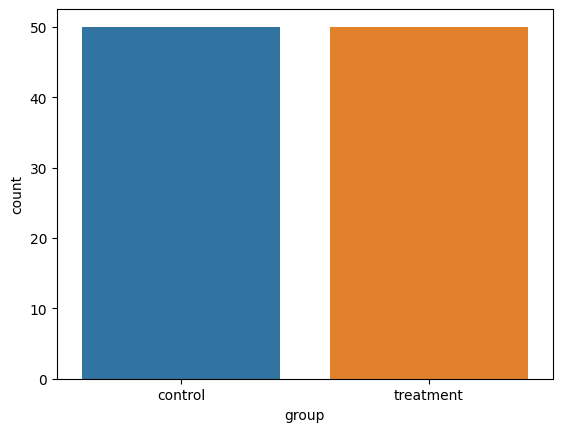

In [ ]:
# For categorical variables we'll use the count plot
sns.countplot(data=df, x='group')
plt.show()

Observations:

Each category has 50 values as stated in the problem statement.

####Landing_Page

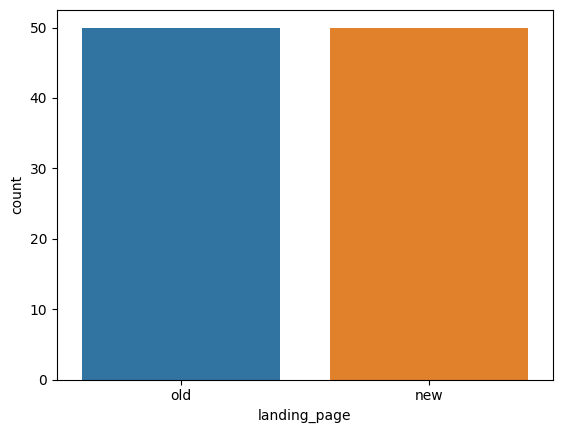

In [ ]:
sns.countplot(data=df, x='landing_page')
plt.show()

Observations:

Same here, 50% went to the old page and 50% to the new one.

#### Converted

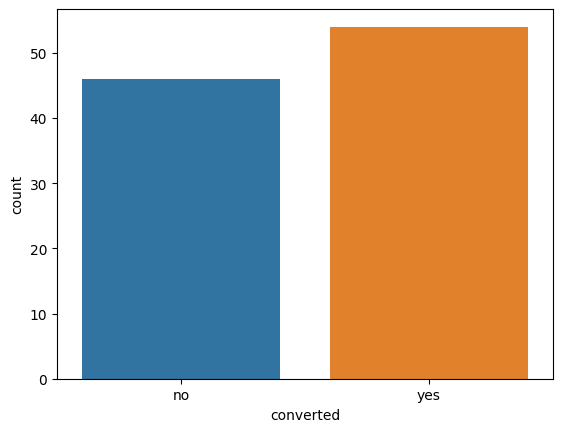

In [ ]:
sns.countplot(data=df, x='converted')
plt.show()

Observations:

The majority of the visitors converted, but I want to know exactly how many.

In [ ]:
# I'll use value_counts() function to get the number of conversions

print(df['converted'].value_counts())
print('-'*50)
print(df['converted'].value_counts(normalize=True))

yes    54
no     46
Name: converted, dtype: int64
--------------------------------------------------
yes    0.54
no     0.46
Name: converted, dtype: float64


Observations:

54 people converted (54%), and 46 didn't convert (46%).

#### Language_Prefered

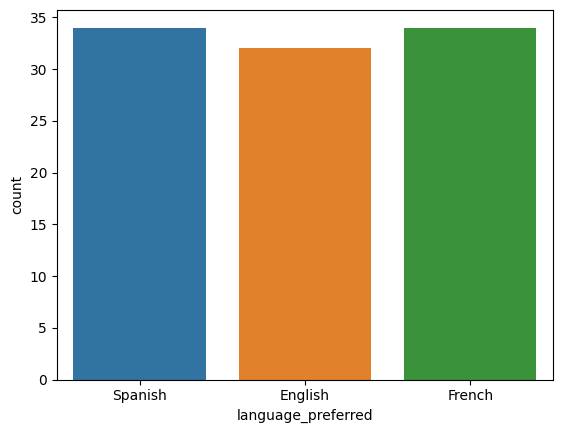

In [ ]:
sns.countplot(data=df, x='language_preferred')
plt.show()

In [ ]:
print(df['language_preferred'].value_counts())
print('-'*50)
print(df['language_preferred'].value_counts(normalize=True))

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64
--------------------------------------------------
Spanish    0.34
French     0.34
English    0.32
Name: language_preferred, dtype: float64


Observations:

The 3 languages were used in almost the same proportion. English was the only one that had 2 fewer visitors (32), compared to Spanish and French (34).

#### Time_spent_on_the_page

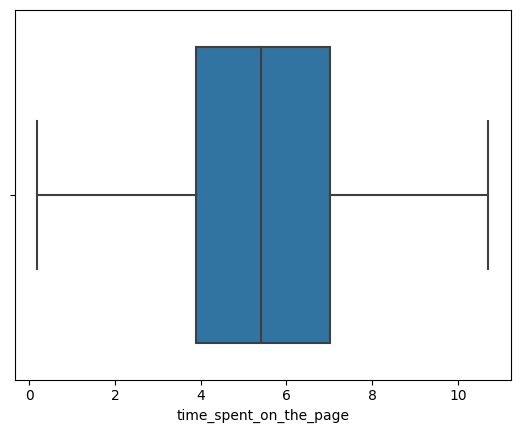

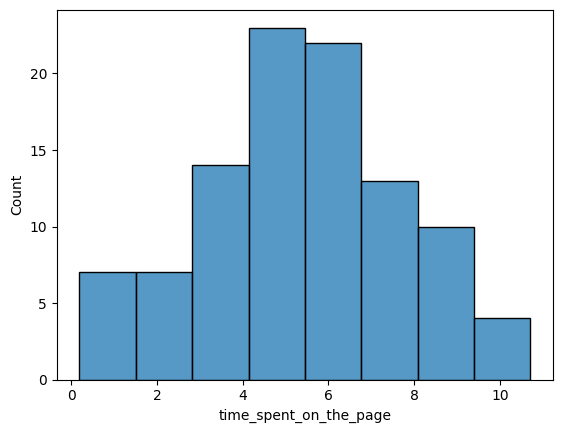

In [ ]:
sns.boxplot(data=df, x='time_spent_on_the_page')
plt.show()
sns.histplot(data=df, x='time_spent_on_the_page')
plt.show()

Observations:

Visually, the data seems pretty normal, there is no skewness, and the histogram resembles a normal distribution.

### Bivariate Analysis

#### Group VS Time Spent

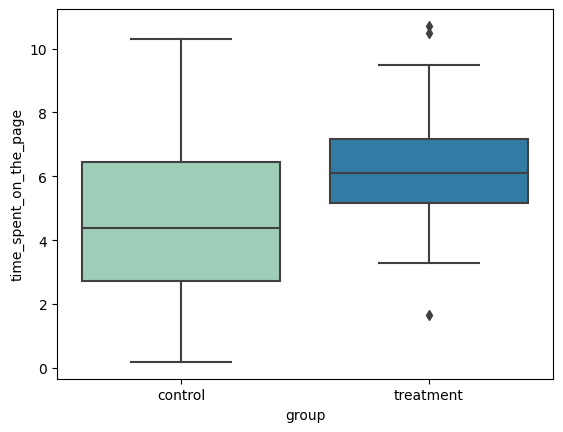

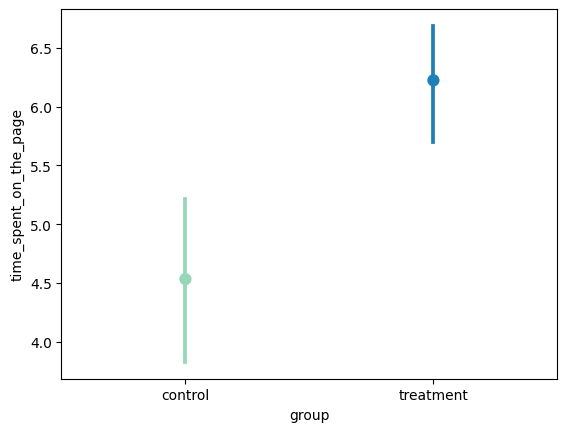

In [ ]:
sns.boxplot(data=df, x='group', y='time_spent_on_the_page', palette='YlGnBu')
plt.show()
sns.pointplot(data=df, x='group', y='time_spent_on_the_page', palette='YlGnBu')
plt.show()

Observations:

On average, the treatment group spent more time on the landing page (6.3 min), compared to the control group (4.5 min).

Also, the control group has a larger distribution compared to the treatment group. 50% of the control group's data lies between ~3 and 6 minutes, which is larger compared to the tratment group that lies between 5 and 7 minutes.

#### Language VS Time Spent

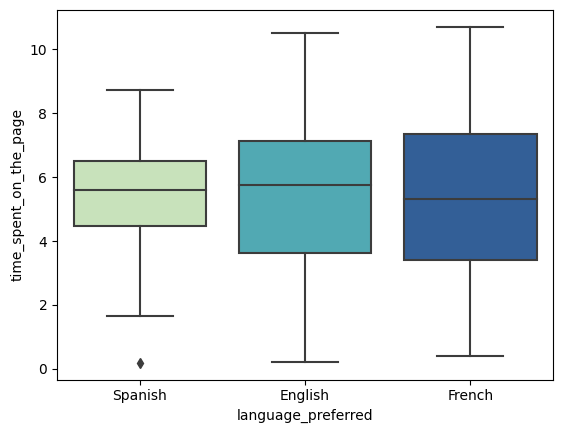

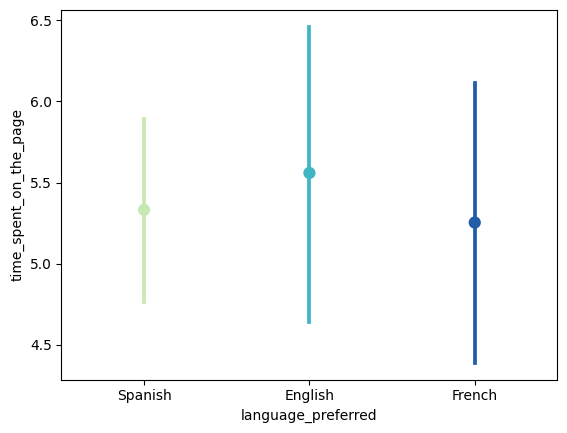

In [ ]:
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page', palette='YlGnBu')
plt.show()
sns.pointplot(data=df, x='language_preferred', y='time_spent_on_the_page', palette='YlGnBu')
plt.show()

Observations:

Overall, the average time spent is pretty similar across all languages. The distributions are also similar, but Spanish has a slightly smaller/more compact distribution compared to the rest.

#### Landing Page & Converted VS Time Spent

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


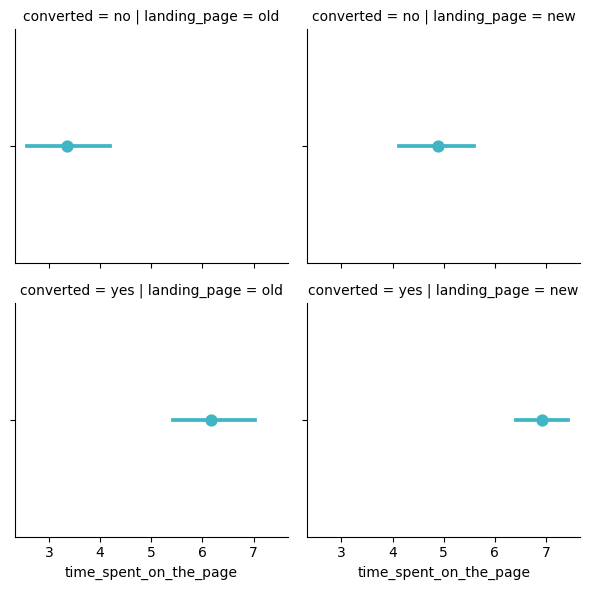

In [ ]:
# Let's create a grid to compare 2 categorical variables (landing_page & converted) against a numerical (time_spent)

sns.FacetGrid(data=df, col="landing_page", row="converted").map(sns.pointplot, "time_spent_on_the_page", palette ='YlGnBu')
plt.show()

Observations:

As expected, when people converted, the average time spent on the page is higher on both pages. However, we also see that when people didn't convert, the new landing page had a higher average time (around 5 minutes) compared to the old page (3.5 minutes).

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


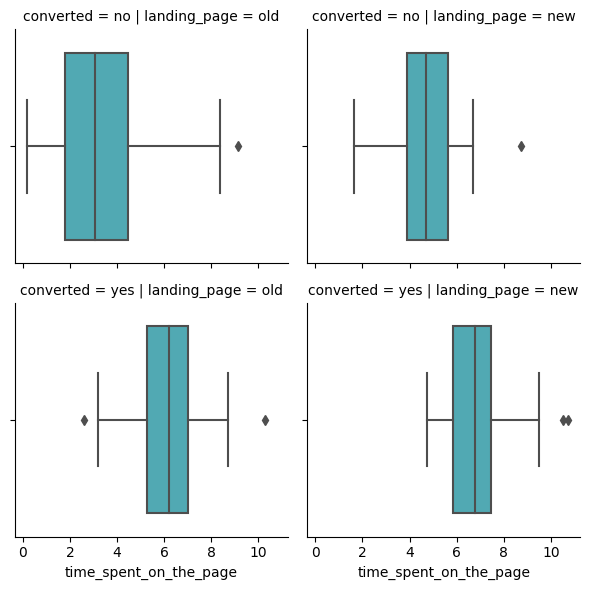

In [ ]:
sns.FacetGrid(data=df, col="landing_page", row="converted").map(sns.boxplot, "time_spent_on_the_page", palette= 'YlGnBu')
plt.show()

Observations:

Here we see that the distribution of the old page when people didn't convert is the largest, compared to the distribution of the new page when people converted, which looks like the smallest. There we also see a couple of outliers that spent more than 10 min on the site.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Visual Analysis

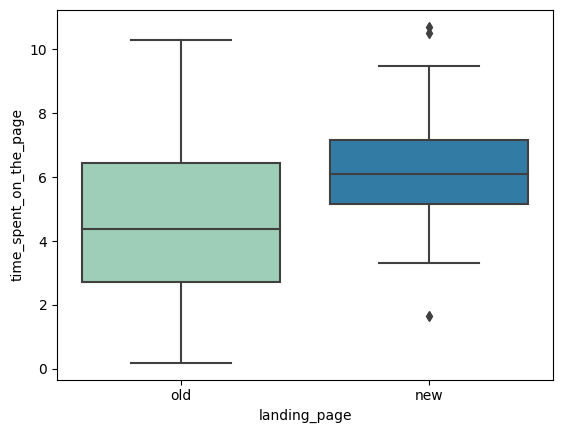

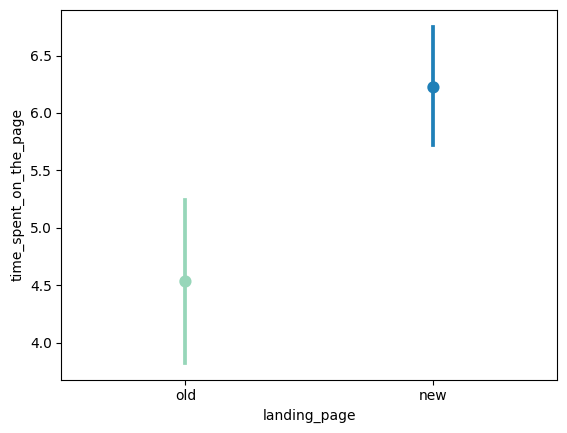

In [ ]:
# Let's compare the time spent on the new and old landing page

sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page', palette='YlGnBu')
plt.show()
sns.pointplot(data=df, x='landing_page', y='time_spent_on_the_page', palette='YlGnBu')
plt.show()

From the graphs we see that the users spent more time on average on the new landing page (6.3 min), compared to the old page (4.5 min).

### Step 1: Define the null and alternate hypotheses

Ho: μNew <= μOld, users spend equal or less time on the new page than the old page

Ha: μNew > μOld, users spend more time on the new page than the old page


- μNew: average time spent on the new page
- μOld: average time spent on the old page

### Step 2: Select Appropriate test

Here we don't know the population variance, therefore we must use a 2 mean t-test

In [ ]:
# first let's create data frames for the time of each page

time_spent_newlp = df[df['landing_page'] == 'new']['time_spent_on_the_page']
time_spent_oldlp = df[df['landing_page'] == 'old']['time_spent_on_the_page']

# Now let's get the standard deviations
print('the standard deviation of new page is', time_spent_newlp.std())
print('the standard deviation of new page is', time_spent_oldlp.std())

the standard deviation of new page is 1.8170310387878263
the standard deviation of new page is 2.581974849306046


The standard deviations are clearly different, therefore we won't assume the variances are equal.

### Step 3: Decide the significance level

As stated in the problem statement, the significance level is 0.05. (This will remain the same for all the following tests).

### Step 4: Collect and prepare data

I'll use the new and old page data frames I created earlier (time_spent_newlp & time_spent_oldlp)

### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import ttest_ind

ttest_ind(time_spent_newlp, time_spent_oldlp, equal_var=False, alternative= 'greater')

Ttest_indResult(statistic=3.7867702694199856, pvalue=0.0001392381225166549)

### Step 6: Compare the p-value with $\alpha$

p_value = 0.000139 is lower than 0.05.

### Step 7:  inference

Since the p_value is lower than 0.05, we reject the null hypothesis and conclude that the average time of the new page is higher than the average time of the old page with a significance level of 5%.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Visual Analysis:

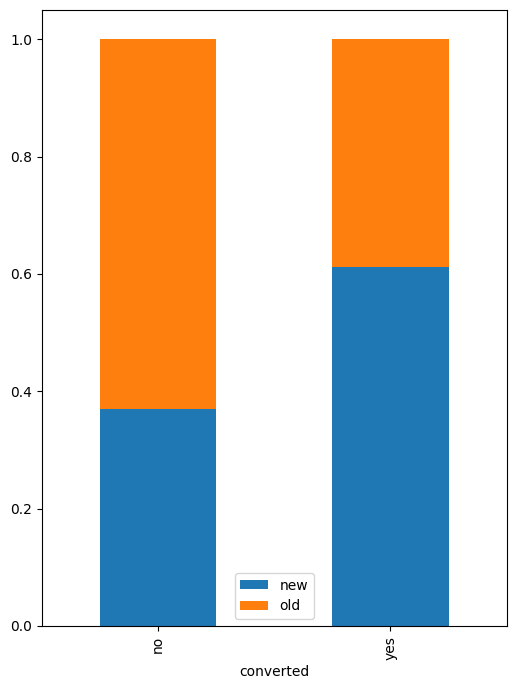

In [ ]:
# Let's compare the conversion of the new and old page

pd.crosstab(df['converted'],df['landing_page'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

Here we see that when people converted, the proportion of new page visitors is higher (0.6). Now let's run the test.

**Hypotheses:**

Ho: Conversion Rate of New Page <= Conversion Rate of Old Page

Ha: Conversion Rate of New Page > Conversion Rate of Old Page

In [ ]:
# Let's get the number of people who converted on each page

df['converted'].value_counts()

# we know that 54 people converted, so the sum of conversions in the new and old page must be 54

yes    54
no     46
Name: converted, dtype: int64

In [ ]:
# Let's get the count of people that converted on the new and old landing page with value_counts()

converted_new = df[df['converted'] == 'yes']['landing_page'].value_counts()['new']
converted_old = df[df['converted'] == 'yes']['landing_page'].value_counts()['old']

print('The amount of people that converted in the new page is', converted_new)
print('The amount of people that converted in the new page is', converted_old)
print('And the total amount is', converted_new + converted_old)

The amount of people that converted in the new page is 33
The amount of people that converted in the new page is 21
And the total amount is 54


In [ ]:
# The sum of converted_new and converted_old is 54, therefore we're on the right track

In [ ]:
# Now let's get the number of people that went to each page

n_new_page = df['landing_page'].value_counts()['new']
n_old_page = df['landing_page'].value_counts()['old']

In [ ]:
# Now let's run the test.
# This will be a 1-tailed test, and with the alternative as larger since we want to check is one proportion is larger than the other one, not just different.

from statsmodels.stats.proportion import proportions_ztest

proportions_ztest([converted_new, converted_old], [n_new_page, n_old_page], alternative = 'larger')

(2.4077170617153842, 0.008026308204056278)

**Answer:**

The P_value (0.0080) is lower than 0.05, therefore, we have enough statistical evidence to reject the null hypothesis and conclude that the conversion rate on the new page is higher than the conversion rate of the old page.


## 3. Is the conversion and preferred language are independent or related?

Visual Analysis:

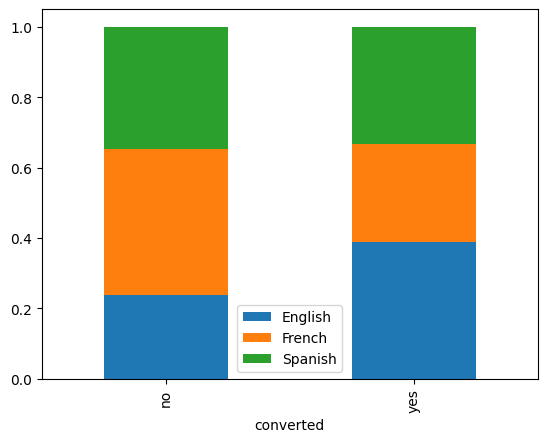

In [ ]:
# Let's compare the conversions by the language preferred

pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind='bar',stacked =True)
plt.legend()
plt.show()

The biggest difference visually is that the count of people who preferred french is higher when they didn't convert and that the count of English is a bit lower when they didn't convert. Let's run a test to find out if they're actually independent or not.

Here we must to an independence test, therefore, we'll run the Chi Square test of independence.


**Hypotheses:**

Ho: Conversion and preferred language are independent

Ha: Conversion and preferred language are NOT independent

In [ ]:
# Let's build a contingency table of the variables 'converted' and 'language_preferred'

contingency_t = pd.crosstab(df['converted'], df['language_preferred'])
contingency_t

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [ ]:
# Let's run the test to test the independence

from scipy.stats import chi2_contingency

chi2_contingency(contingency_t)

Chi2ContingencyResult(statistic=3.0930306905370837, pvalue=0.21298887487543447, dof=2, expected_freq=array([[14.72, 15.64, 15.64],
       [17.28, 18.36, 18.36]]))

**Answer:**

The P_value (0.2129) is larger than 0.05, therefore, we do not have enough statistical evidence to reject the null hypothesis and conclude that Conversion and Preferred Language are independent.

## 4. Is the time spent on the new page same for the different language users?

In [ ]:
# First, let's create a new data frame of all the data of the new landing page
df_new = df.query("landing_page == 'new'").reset_index()
df_new.head()

,index,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,1,546468,treatment,new,7.13,yes,English
1,2,546462,treatment,new,4.40,no,Spanish
2,4,546459,treatment,new,4.75,yes,Spanish
3,6,546448,treatment,new,5.25,yes,French
4,8,546461,treatment,new,10.71,yes,French


Visual Analysis:

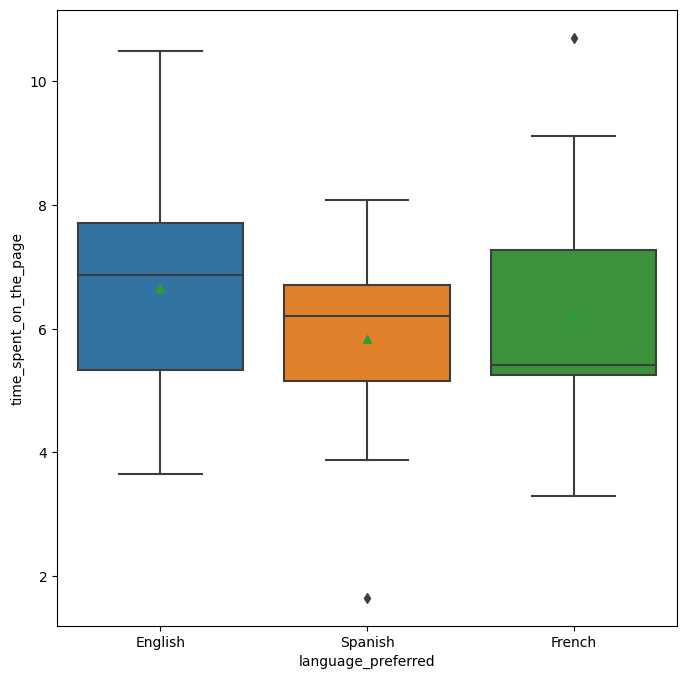

In [ ]:
# Let's compare the time spent on the new landing page by the 3 languages

plt.figure(figsize=(8,8))
sns.boxplot(data = df_new, x = df_new['language_preferred'], y = df_new['time_spent_on_the_page'], showmeans = True)
plt.show()

The average time spent across the 3 laguages is pretty similar, revolving around 6 minutes.

Among the 3, English has the highest variance, then French and then Spanish. We need to see how the group variance compares to the individual variance.

For this question, we need to compare 3 means, therefore we'll use the one-way ANOVA test.

**Hypotheses:**

Ho: All means are equal

Ha: At least one of them is different from the rest

In [ ]:
# Let's create a data frame for the time spent on the new page by each language, using the new data frame (df_new) we created

english_new_page = df_new[df_new['language_preferred'] == 'English']['time_spent_on_the_page']
spanish_new_page = df_new[df_new['language_preferred'] == 'Spanish']['time_spent_on_the_page']
french_new_page = df_new[df_new['language_preferred'] == 'French']['time_spent_on_the_page']

In [ ]:
# Let's run the test

from scipy.stats import f_oneway
f_oneway(english_new_page, spanish_new_page, french_new_page)

F_onewayResult(statistic=0.854399277000682, pvalue=0.43204138694325955)

**Answer:**

The P_value (0.432) is greater than 0.05, therefore, we cannot reject the null hypothesis at a 5% significance level and conclude that the average time spent on the new page is the same across all three languages.

## Conclusion and Business Recommendations

### Conclusions:



Visual / Descriptive conclusions:
- In the experiment, 54% of users converted and 46% did not.
- When users converted, they spent more time on average on the new landing page compared to the old one. It's the same when the user did not convert.
- On average, the treatment group spent more time on the landing page (6.3 min), compared to the control group (4.5 min). Also, the control group has a larger distribution compared to the treatment group. 50% of the control group's data lies between ~3 and 6 minutes, which is larger compared to the tratment group that lies between 5 and 7 minutes.

Inferential / Statistical conclusions:
- On average, users spent more time on the new landing page.
- The conversion rate of the new page is higher than the conversion rate of the old page.
- Conversion rate and preferred language are independent.
- Average time spent on the new page is the same across all languages.

###Recommendations:

The data is clear, users prefer the new landing page. The average time spent is higher and conversion rate is higher.

The data did not show a clear relationship between conversion rate or time spent with the language preferred, therefore one could conclude that the new landing page was well-optimized for all languages. Meaning that the content algorithm was optimized for all languages (assuming that there's a content algorithm) and that the new outline works well for users with different language preferences, and presumably different backgrounds, geographical locations, cultures, etc.

Based on the data, E-news Express should use the new landing page as the main landing page for their site.

There are still some questions left to be asked, for example, if the increment in conversion rate and average time spent was due to the new outline, the new content, or both. if it's both, what's the proportion?

Also, we could ask if the average time spent on the page has an impact on the conversion rate (probably does), and perform the statistical test. For example, there could be a landing page that has a lower average spent time but still generates good conversion rates, maybe because the content is so relatable that the user decides to subscribe right away. That's a viable hypothesis that's worth testing.

However, this can get even more reliable results if it's done on a larger sample.

These new questions would help E-news Express optimize the landing page even more, by determining if they should focus on optimizing the outline, the content algorithm, or both, but knowing the actual impact of each element.

This type of A/B testing and analysis will ensure the landing pages keep getting better over time, which translates into more subscribers and potential business growth for E-news Express.

___